Here I try different feature selection techniques. With help of Medium article
[Feature-selection](https://towardsdatascience.com/feature-selection-a-comprehensive-list-of-strategies-3fecdf802b79)

### Loading dataset

In [24]:
import pandas as pd
import numpy as np

np.random.seed(59)

# set the max columns to none
pd.set_option('display.max_columns', None)

In [25]:
rel_path = 'featured_data\\train.csv'
df = pd.read_csv(rel_path)
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,state_MD,state_MN,state_NJ,state_TX,state_WV,state_other,avg_mt_minutes,avg_mt_calls,avg_mt_charge,avg_call_charge,avg_intl_call_charge,avg_call_minutes,avg_intl_call_minutes,both_plans
0,107,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54,0,1,0,0,0,0,0,0,1,5.714953,3.074766,0.519065,0.168815,1.233333,1.858663,4.566667,0
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00,0,1,0,0,0,1,0,0,0,3.848175,2.394161,0.430657,0.179878,0.658000,1.607317,2.440000,0
2,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02,1,0,0,0,0,0,0,0,1,6.645238,2.952381,0.774048,0.262177,0.254286,2.250806,0.942857,0
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36,0,1,0,0,0,0,0,0,1,6.692000,4.746667,0.658133,0.138652,0.910000,1.409831,3.366667,0
4,121,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28,0,0,1,0,0,0,0,0,1,6.440496,2.595041,0.630413,0.242930,0.290000,2.481847,1.071429,0


In [26]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,state_MD,state_MN,state_NJ,state_TX,state_WV,state_other,avg_mt_minutes,avg_mt_calls,avg_mt_charge,avg_call_charge,avg_intl_call_charge,avg_call_minutes,avg_intl_call_minutes,both_plans
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,100.172825,0.093683,0.259118,7.585697,10.253206,4.425268,2.768882,1.513468,0.142551,580.432968,299.998808,56.620117,0.256257,0.496067,0.247676,0.020262,0.025507,0.022884,0.022884,0.032658,0.875805,8.924823,4.592859,0.867238,0.191281,0.856833,1.960630,3.172906,0.024315
std,39.661706,0.291422,0.438203,13.409350,2.762227,2.468945,0.745774,1.246071,0.349656,88.963753,34.432531,10.350788,0.436618,0.500044,0.431714,0.140913,0.157677,0.149553,0.149553,0.177761,0.329844,26.507227,13.662220,2.559411,0.041955,0.631679,0.380115,2.339314,0.154043
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.200000,188.000000,19.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.820725,1.085586,0.153886,0.063581,0.000000,0.781818,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,8.500000,3.000000,2.300000,1.000000,0.000000,520.600000,277.000000,49.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.458903,2.339421,0.426994,0.162757,0.455714,1.696857,1.685714,0.000000
50%,99.000000,0.000000,0.000000,0.000000,10.300000,4.000000,2.780000,1.000000,0.000000,580.700000,300.000000,56.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.822917,3.000000,0.568421,0.188060,0.680000,1.931790,2.520000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,12.000000,6.000000,3.240000,2.000000,0.000000,640.550000,323.000000,63.430000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.074866,4.143892,0.789408,0.217139,1.041667,2.193866,3.858333,0.000000
max,243.000000,1.000000,1.000000,50.000000,20.000000,20.000000,5.400000,9.000000,1.000000,876.900000,410.000000,92.560000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,704.100000,372.000000,68.060000,0.402548,4.910000,3.693644,18.200000,1.000000


## Before inializing the model

### Remove unused columns

There are no such features (ID, First Name, Last Name, etc)

### Columns with missing values

Again there are no such features, every feature has no missing values

### Uncorrelated features

<AxesSubplot:>

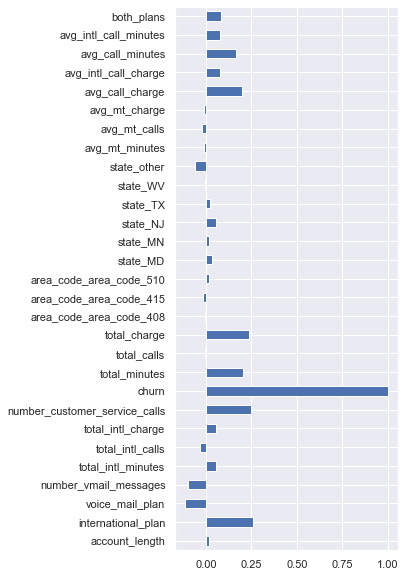

In [27]:
# correlation between target and features
df.corr().loc['churn'].plot(kind='barh', figsize=(4, 10))

We see that we can drop barely correlated features such as `state_WV`, `area_code_area_code_408`, etc.

We will see in other techniques if these features remain useless

### Multicollinearity

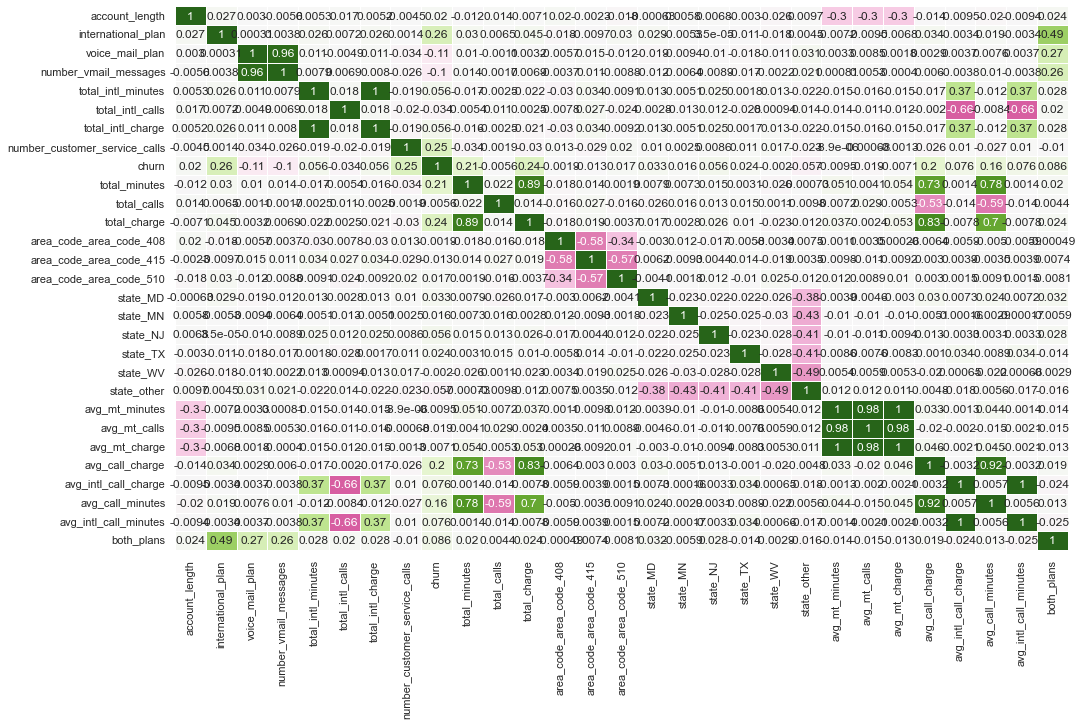

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (16, 10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()

There are a lot of correlated features that we can drop, so we will drop with `threshold = 0.8`

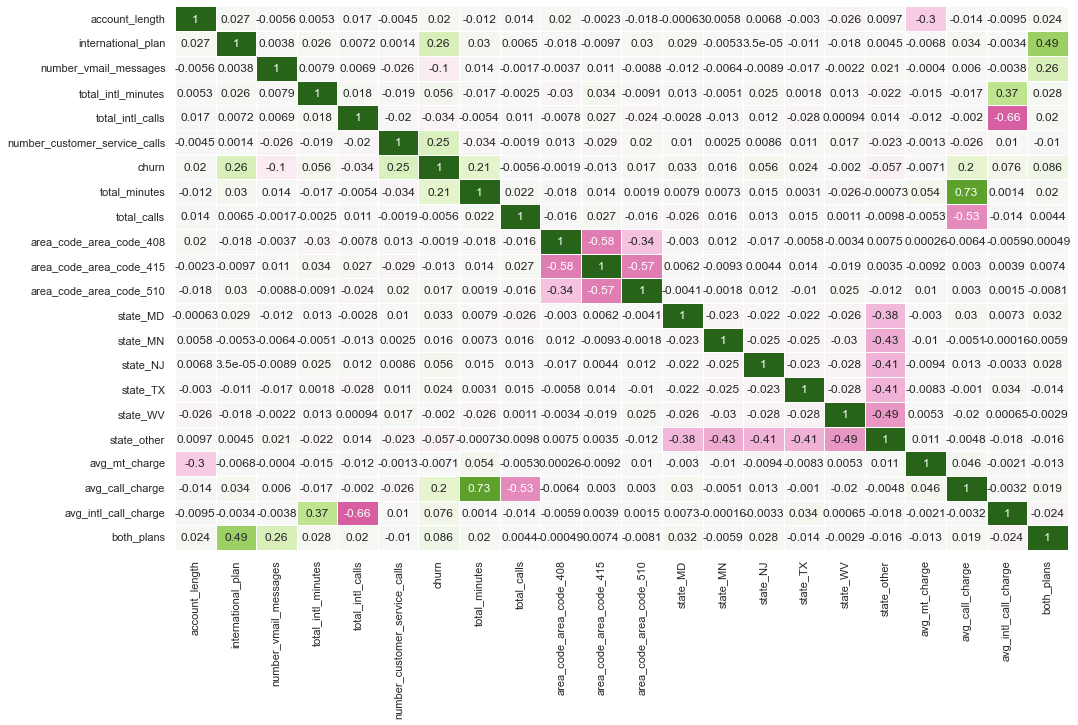

In [29]:
df.drop(['total_intl_charge', 'total_charge', 'avg_mt_minutes', 'avg_mt_calls',
         'avg_call_minutes', 'avg_intl_call_minutes', 'voice_mail_plan'], axis=1, inplace=True)

sns.set(rc={'figure.figsize': (16, 10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()

That's a lot better

## With model

Due to the fact that `XGBClassifier` was the fastest and the best model in terms of score, we will use it with `SHAP`, to determine what impact different features have on the prediction. With this, we will consider which features to keep and which to drop.

Moreover `SMOTEENN` had in general better results, so we will use it here too

In [30]:
from collections import Counter
from imblearn.combine import SMOTEENN

X = df.drop('churn', axis=1)
y = df.churn
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTEENN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 3597, 1: 598})
Counter({1: 2996, 0: 2071})


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    shuffle=True, random_state=59)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       313
           1       0.98      0.97      0.98       448

    accuracy                           0.97       761
   macro avg       0.97      0.97      0.97       761
weighted avg       0.97      0.97      0.97       761

F1 Score: 0.9752808988764045


In [33]:
# This takes a minute or two
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


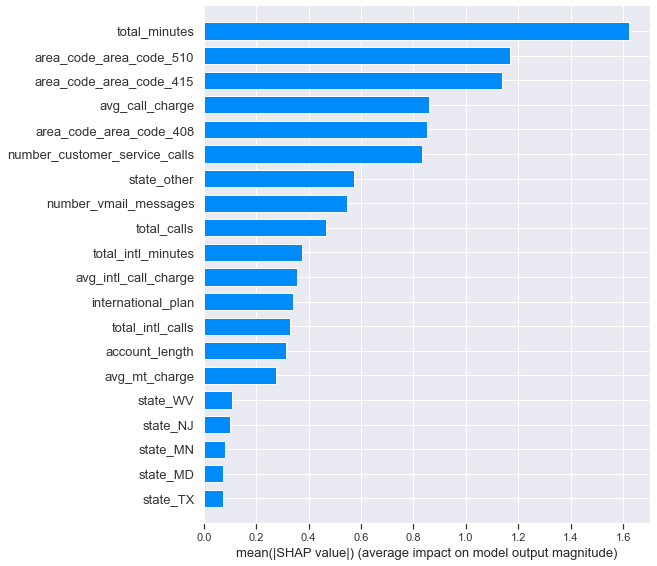

In [38]:
# Put out columns names to have an idea what features are on the plot
X_display = X.columns
# Combine it with X_test
X_display = pd.DataFrame(data=X_test, columns=X_display)

shap.summary_plot(shap_values, X_display, plot_type="bar")

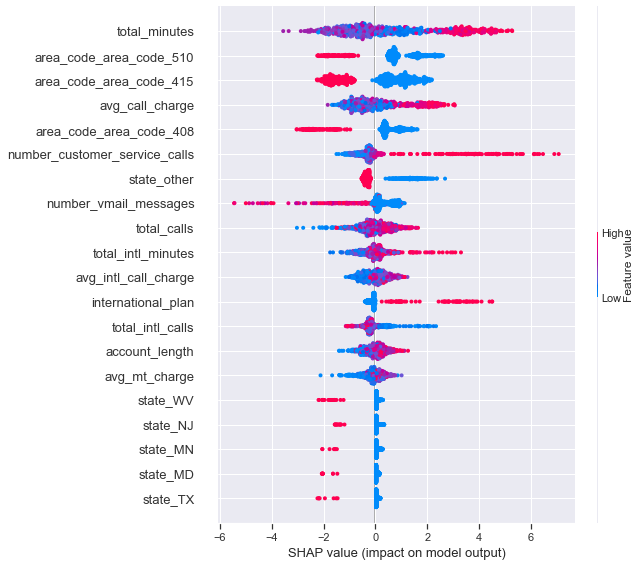

In [39]:
shap.summary_plot(shap_values, X_display)

To sum up: `state` feature has low impact, so we can drop it (apparently customer from every state can be churn or not). Hpwever `state_other` is considered as an important one (apparently it is division by only two regions, where the are a lot of churn customers or not)

Now we know which features we need to drop right after feature-engineering, so there is a script needed for such work